### 셋팅 환경 세팅

- matplotlib만 설치할 것
- 설치 후 커널 재시작 필요

In [3]:
#!pip install matplotlib

### 폴리곤 좌표 변경

In [1]:
### 패키지
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
os.chdir('/code')
from utils import *
from shapely.geometry import LineString, Point, Polygon

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


JSON
[['10', '250'], ['300', '180'], ['301', '200'], ['11', '270']]
REAL
[(10, 250), (300, 180), (301, 200), (11, 270)]


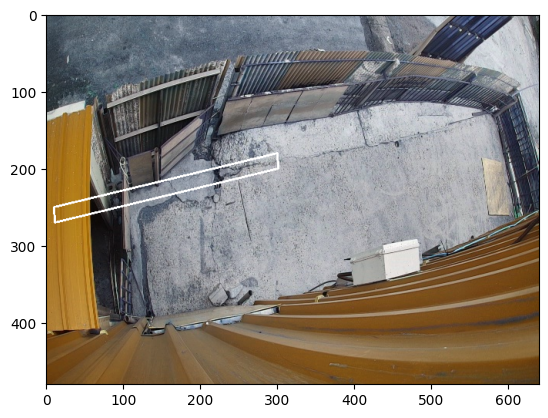

In [2]:
### 기존 라인 불러오기

setting_path = '/code/setting/'
sample_path = '/code/sample'
Farm = 'BUGUN'
house = 'Dong_1'
counter = 'DEAD'

image_path = os.path.join(sample_path, Farm + "_" + house + "_" + counter + ".jpg")

with open(os.path.join(setting_path, Farm + '.json'), 'r') as f :
    json_data = json.load(f)
    
## 카메라 번호 찾기
cam_name_dict = json_data['CAM_NAME']
reverse_cam_name_dict = {v:k for k,v in cam_name_dict.items()}
cam_no = reverse_cam_name_dict[house]

## 현재 json 파일에 적혀있는 것
rect = json_data['MULTI_CAM'][cam_no][counter]
print("JSON")
print(rect)

rtsp, region_points = SearchParam(setting_path, Farm, house, counter)

## 실제 적용되는 좌표
print("REAL")
print(region_points)

## 사진 출력
image = cv2.imread(image_path)
points_array = np.array(region_points, dtype=np.int32)
cv2.polylines(image, [points_array], isClosed=True, color = (255, 255, 255), thickness=2)
plt.imshow(image)

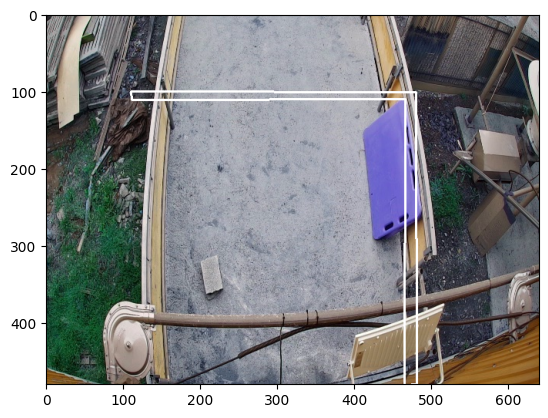

In [10]:
### 라인 변경

### 기존 라인 불러오기

setting_path = '/code/setting/'
sample_path = '/code/sample'
Farm = 'BUGUN'
house = 'Dong_3_FRONT'
counter = 'DEAD'

### 변경하고 싶은 좌표
rect = [['110', '100'], ['480', '101'], ['481', '480'], ['465', '481'], ['466','110'], ['111','111']]

### 좌표 수정
region_points = []
for sublist in rect:
    region_points.append((int(sublist[0]), int(sublist[1])))

image_path = os.path.join(sample_path, Farm + "_" + house + "_" + counter + ".jpg")

with open(os.path.join(setting_path, Farm + '.json'), 'r') as f :
    json_data = json.load(f)
    
rtsp, _ = SearchParam(setting_path, Farm, house, counter)

image = cv2.imread(image_path)
points_array = np.array(region_points, dtype=np.int32)
cv2.polylines(image, [points_array], isClosed=True, color = (255, 255, 255), thickness=2)
plt.imshow(image)

## 저장
## 카메라 번호 찾기
cam_name_dict = json_data['CAM_NAME']
reverse_cam_name_dict = {v:k for k,v in cam_name_dict.items()}
cam_no = reverse_cam_name_dict[house]

json_data["MULTI_CAM"][cam_no][counter] = rect

## 저장
with open(os.path.join(setting_path, Farm + '.json'), 'w') as json_file:
    json.dump(json_data, json_file, indent=4) 